In [1]:
import xenonpy
xenonpy.__version__
import numpy as np

In [2]:

%run tools.ipynb

np.random.seed(201906)



In [3]:
# load in-house data
data = pd.read_csv("./iQSPR_sample_data.csv")

# take a look at the data
data.columns
data.head()

Index(['Unnamed: 0', 'SMILES', 'E', 'HOMO-LUMO gap'], dtype='object')

,Unnamed: 0,SMILES,E,HOMO-LUMO gap
0,1,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,177.577,4.352512
1,2,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,185.735,7.513497
2,3,C1=CC(C(C(=C1)C(=O)O)O)O,98.605,4.581348
3,4,CC(CN)O,83.445,8.034841
4,5,C(C(=O)COP(=O)(O)O)N,90.877,5.741310


(array([ 215., 1512., 1958., 2862., 2339., 2390., 1606., 1604.,  953.,
         650.,  303.,  110.,   67.,   38.,   35.,   16.,    5.,    5.,
           3.,    3.]),
 array([  1.  ,   6.55,  12.1 ,  17.65,  23.2 ,  28.75,  34.3 ,  39.85,
         45.4 ,  50.95,  56.5 ,  62.05,  67.6 ,  73.15,  78.7 ,  84.25,
         89.8 ,  95.35, 100.9 , 106.45, 112.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram for length of SMILES strings')

Text(0.5, 0, 'SMILES length (counting characters)')

Text(0, 0.5, 'Counts')

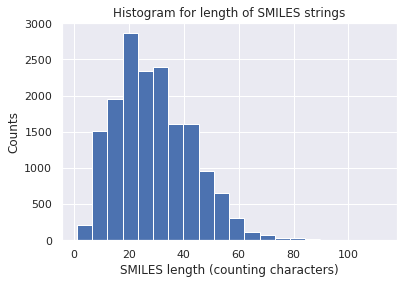

In [4]:
# check the SMILES length
count = [len(x) for x in data['SMILES']]
plt.hist(count, bins=20)  # arguments are passed to np.histogram
plt.title('Histogram for length of SMILES strings')
plt.xlabel('SMILES length (counting characters)')
plt.ylabel('Counts')
plt.show()


<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'iQSPR sample data')

Text(0.5, 0, 'Internal energy')

Text(0, 0.5, 'HOMO-LUMO gap')

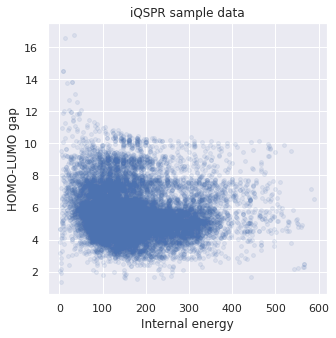

In [5]:


# check target properties: E & HOMO-LUMO gap
plt.figure(figsize=(5,5))
plt.scatter(data['E'],data['HOMO-LUMO gap'],s=15,c='b',alpha = 0.1)
plt.title('iQSPR sample data')
plt.xlabel('Internal energy')
plt.ylabel('HOMO-LUMO gap')
plt.show()



   index  Unnamed: 0                               SMILES        E  \
0  16101       23630            CC(C)CN1CC(C1)C2=CC=CC=C2  193.542   
1  13275       19222               C1=CC(=CN=C1)C(=O)OCCO  110.998   
2  13879       20189  C1=CC(=CC=C1CC(C(=O)O)N)N(CCCl)CCCl  202.960   
3   5313        7775                    CCCCCC(=O)OCC(C)C  191.230   
4   8254       11881         C1=CC(=C(C=C1O)C(=O)O)C(=O)O   91.482   

   HOMO-LUMO gap  
0       5.914093  
1       5.186226  
2       5.400097  
3       7.727368  
4       4.856441  


<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'iQSPR sample data')

Text(0.5, 0, 'Internal energy')

Text(0, 0.5, 'HOMO-LUMO gap')

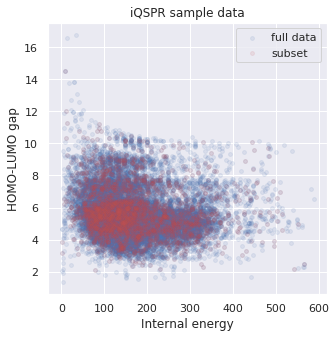

In [6]:
np.random.seed(201903) # fix the random seed

# extract a subset from the full data set
data_ss = data.sample(3000).reset_index()
print(data_ss.head())

# check target properties: E & HOMO-LUMO gap
plt.figure(figsize=(5,5))
plt.scatter(data['E'],data['HOMO-LUMO gap'],s=15,c='b',alpha = 0.1,label="full data")
plt.scatter(data_ss['E'],data_ss['HOMO-LUMO gap'],s=15,c='r',alpha = 0.1,label="subset")
plt.legend(loc='upper right')
plt.title('iQSPR sample data')
plt.xlabel('Internal energy')
plt.ylabel('HOMO-LUMO gap')
plt.show()

In [7]:
from xenonpy.descriptor import Fingerprints

RDKit_FPs = Fingerprints(featurizers=['ECFP', 'MACCS'], input_type='smiles')

In [8]:
tmp_FPs = RDKit_FPs.transform(data_ss['SMILES'])
print(tmp_FPs.head())


   maccs:0  maccs:1  maccs:2  maccs:3  maccs:4  maccs:5  maccs:6  maccs:7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   maccs:8  maccs:9  ...  ecfp3:2038  ecfp3:2039  ecfp3:2040  ecfp3:2041  \
0        1        0  ...           0           0           0           0   
1        0        0  ...           0           0           0           0   
2        0        0  ...           0           0           0           0   
3        0        0  ...           0           0           0           0   
4        0        0  ...           0           0           0           0   

   ecfp3:2042  ecfp3:2043  ecfp3:2044  ecfp3:2045  ecfp3:2046  ecfp3:2047  
0   

In [9]:
# XenonPy descriptor calculation library
from xenonpy.descriptor.base import BaseDescriptor
from xenonpy.descriptor import ECFP, MACCS

In [10]:
# prepare descriptor function from XenonPy (possible to combine multiple descriptors)
class RDKitDesc(BaseDescriptor):
    def __init__(self, n_jobs=-1, on_errors='nan'):
        super().__init__()
        self.n_jobs = n_jobs

        self.rdkit_fp = ECFP(n_jobs, on_errors=on_errors, input_type='smiles')
        self.rdkit_fp = MACCS(n_jobs, on_errors=on_errors, input_type='smiles')

ECFP_plus_MACCS = RDKitDesc()

In [11]:
tmp_FPs = ECFP_plus_MACCS.transform(data_ss['SMILES'])
print(tmp_FPs.head())

   ecfp3:0  ecfp3:1  ecfp3:2  ecfp3:3  ecfp3:4  ecfp3:5  ecfp3:6  ecfp3:7  \
0        0        1        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        1        0        0        0        0        0        0   
3        0        1        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   ecfp3:8  ecfp3:9  ...  maccs:157  maccs:158  maccs:159  maccs:160  \
0        0        0  ...          0          1          0          1   
1        0        0  ...          1          0          1          0   
2        0        0  ...          1          1          1          0   
3        0        0  ...          1          0          1          1   
4        0        0  ...          1          0          1          0   

   maccs:161  maccs:162  maccs:163  maccs:164  maccs:165  maccs:166  
0          1          1          1

In [12]:
%load_ext autoreload
%aimport xenonpy.inverse.iqspr.estimator, xenonpy.inverse.iqspr.modifier,xenonpy.inverse.base, xenonpy.inverse.iqspr.iqspr
%autoreload 1

In [13]:
# Forward model template in XenonPy-iQSPR
from xenonpy.inverse.iqspr.estimator import GaussianLogLikelihood

In [14]:

# write down list of property name(s) for forward models and decide the target region
# (they will be used as a key in whole iQSPR run)
prop = ['E','HOMO-LUMO gap']
target_range = {'E': (0,200), 'HOMO-LUMO gap': (-np.inf, 3)}

# import descriptor class to iQSPR and set the target of region of the properties
prd_mdls = GaussianLogLikelihood(descriptor=RDKit_FPs, targets = target_range)

# train forward models inside iQSPR
prd_mdls.fit(data_ss['SMILES'], data_ss[prop])

# target region can also be updated afterward
prd_mdls.update_targets(reset=True,**target_range)


In [15]:
prd_mdls['E']

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [16]:
%%time

pred = prd_mdls.predict(data_ss['SMILES'])
print(pred.head())

      E: mean     E: std  HOMO-LUMO gap: mean  HOMO-LUMO gap: std
0  216.509826  30.797906             6.447289            0.665743
1  149.129376  30.668275             5.067788            0.663043
2  196.939862  29.519475             5.394701            0.642767
3  223.707730  29.193235             7.786168            0.635042
4   87.583524  30.042102             4.707544            0.649219
CPU times: user 3.91 s, sys: 309 ms, total: 4.22 s
Wall time: 6.53 s


In [17]:
target_range

{'E': (0, 200), 'HOMO-LUMO gap': (-inf, 3)}

In [18]:

%%time

# calculate log-likelihood for a given target property region
tmp_ll = prd_mdls(data_ss['SMILES'], **target_range)
#print(tmp_ll.head())

CPU times: user 4.33 s, sys: 464 ms, total: 4.8 s
Wall time: 6.89 s


In [19]:
tmp_ll

,E,HOMO-LUMO gap
0,-1.217547,-16.004130
1,-0.049805,-7.003767
2,-0.613814,-9.236479
3,-1.568449,-31.357115
4,-0.001869,-5.456765
...,...,...
2995,-0.005870,-11.282168
2996,-0.012196,-36.550867
2997,-0.900487,-9.893346
2998,-0.001176,-5.535704


In [20]:
tmp_ll.shape

(3000, 2)

<Figure size 576x360 with 0 Axes>

(array([  2.,   2.,   1.,   0.,   0.,   1.,   2.,   2.,   2.,  10.,   5.,
          2.,   6.,  11.,  19.,  14.,  20.,  19.,  28.,  27.,  31.,  32.,
         31.,  29.,  49.,  30.,  40.,  43.,  48.,  48.,  48.,  52.,  70.,
         60.,  61.,  77.,  89., 107., 126., 131., 164., 209., 209., 182.,
        194., 183., 170., 151., 118.,  45.]),
 array([-61.25630804, -60.03921349, -58.82211893, -57.60502438,
        -56.38792982, -55.17083527, -53.95374071, -52.73664616,
        -51.5195516 , -50.30245705, -49.08536249, -47.86826794,
        -46.65117338, -45.43407883, -44.21698427, -42.99988972,
        -41.78279516, -40.56570061, -39.34860605, -38.1315115 ,
        -36.91441694, -35.69732239, -34.48022783, -33.26313328,
        -32.04603872, -30.82894417, -29.61184961, -28.39475506,
        -27.1776605 , -25.96056595, -24.74347139, -23.52637684,
        -22.30928228, -21.09218773, -19.87509318, -18.65799862,
        -17.44090407, -16.22380951, -15.00671496, -13.7896204 ,
        -12.572525

Text(0.5, 1.0, 'ln(likelihood) for SMILES in the data subset')

Text(0.5, 0, 'ln(likelihood)')

Text(0, 0.5, 'Counts')

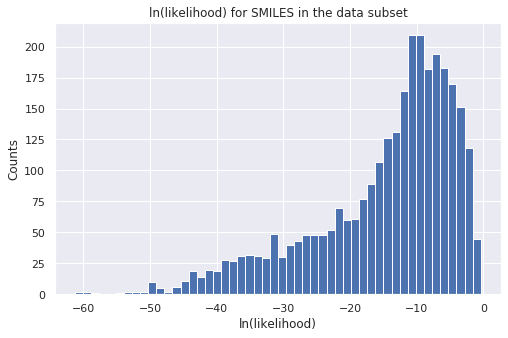

<Figure size 576x360 with 0 Axes>

(array([2.644e+03, 1.050e+02, 4.000e+01, 3.900e+01, 3.100e+01, 2.100e+01,
        1.400e+01, 1.700e+01, 1.100e+01, 5.000e+00, 7.000e+00, 6.000e+00,
        7.000e+00, 5.000e+00, 4.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([2.49300664e-27, 1.33852316e-02, 2.67704631e-02, 4.01556947e-02,
        5.35409263e-02, 6.69261578e-02, 8.03113894e-02, 9.36966210e-02,
        1.07081853e-01, 1.20467084e-01, 1.33852316e-01, 1.47237547e-01,
        1.60622779e-01, 1.74008010e-01, 1.87393242e-01, 2.00778474e-01,
        2.14163705e-01, 2.27548937e-01, 2.40934168e-01, 2.54319400e-01,
        2.677046

Text(0.5, 1.0, 'Likelihood for SMILES in the data subset')

Text(0.5, 0, 'Likelihood')

Text(0, 0.5, 'Counts')

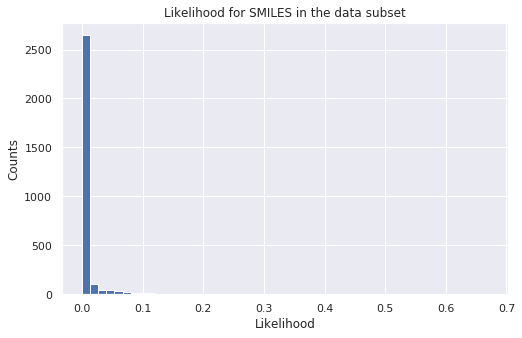

In [21]:
# plot histogram of log-likelihood values
tmp = tmp_ll.sum(axis = 1, skipna = True)

plt.figure(figsize=(8,5))
plt.hist(tmp, bins=50)
plt.title('ln(likelihood) for SMILES in the data subset')
plt.xlabel('ln(likelihood)')
plt.ylabel('Counts')
plt.show()

# plot histogram of likelihood values
plt.figure(figsize=(8,5))
plt.hist(np.exp(tmp), bins=50)
plt.title('Likelihood for SMILES in the data subset')
plt.xlabel('Likelihood')
plt.ylabel('Counts')
plt.show()

In [22]:
pred['E: mean']

0       216.509826
1       149.129376
2       196.939862
3       223.707730
4        87.583524
           ...    
2995    125.904049
2996    135.561992
2997    207.775942
2998    103.057975
2999    203.748815
Name: E: mean, Length: 3000, dtype: float64

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Pubchem data')

Text(0.5, 0, 'E')

Text(0, 0.5, 'HOMO-LUMO gap')

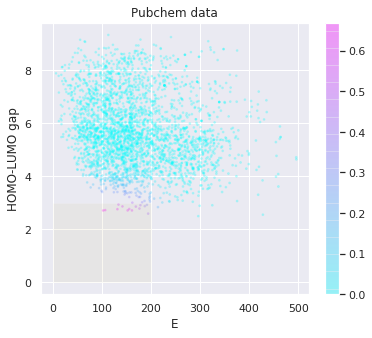

In [23]:
# check the predicted likelihood
dot_scale = 0.1
l_std = np.sqrt(pred['E: std']**2+pred['HOMO-LUMO gap: std']**2)

plt.figure(figsize=(6,5))
rectangle = plt.Rectangle((0,0),200,3,fc='y',alpha=0.1)
plt.gca().add_patch(rectangle)
im = plt.scatter(pred['E: mean'], pred['HOMO-LUMO gap: mean'], s=l_std*dot_scale, c=np.exp(tmp),alpha = 0.2,cmap=plt.get_cmap('cool'))
plt.title('Pubchem data')
plt.xlabel('E')
plt.ylabel('HOMO-LUMO gap')
plt.colorbar(im)
plt.show()

In [24]:
%%time

# N-gram library in XenonPy-iQSPR
from xenonpy.inverse.iqspr import NGram

# initialize a new n-gram
n_gram = NGram()

# train the n-gram with SMILES of available molecules
n_gram.fit(data_ss['SMILES'],train_order=5)

/home/ning/anaconda3/lib/python3.7/site-packages/xenonpy/inverse/iqspr/modifier.py:156: RuntimeWarning: max <sample_order>: 10 is greater than max <train_order>: 5,max <sample_order> will be reduced to max <train_order>
  RuntimeWarning)
100%|██████████| 3000/3000 [02:14<00:00, 22.26it/s]

CPU times: user 2min 17s, sys: 1.92 s, total: 2min 19s
Wall time: 2min 14s


NGram(del_range=(1, 10), max_len=1000, min_len=1, ngram_tab=None,
      reorder_prob=0, sample_order=(1, 5))

In [25]:
np.random.seed(201903) # fix the random seed

# perform pure iQSPR molecule generation starting with 5 initial molecules
n_loop = 5
tmp = data_ss['SMILES'][:5]
for i in range(n_loop):
    tmp = n_gram.proposal(tmp)
    print('Round %i' % i,tmp)

Round 0 ['CC(C)CN1CC(C1)C1=CC=CC=C1', 'C1=CC(=CN=C1)S', 'C1=CC(=CC=C1CC(C(=O)O)N)Cl', 'CCCCCC(=O)OCC1=CC=C(C=C1)O', 'C1=CC(=C(C=C1O)C(=O)O)[N+](=O)[O-]']
Round 1 ['CC(C)CN1CC(C1)C1=CC=CC=C1', 'C1=CC(=CN=C1)Cl', 'C1=CC(=CC=C1CCCC(=O)O)OC', 'CCCCCC(=O)OCC1=CC=C(C=C1)C(C)N(CCCCC)C=C(C(=C)O)C(=O)N(C)S(=O)(=O)O', 'C1=CC(=C(C=C1O)C(=O)O)CCO']
Round 2 ['CC(C)CN1CC(C1)C1=CC=CC=C1', 'C1=CC(=CN=C1)C1=CC(=CC(=C1)OC)O', 'C1=CC(=CC=C1CCCC(=O)O)C(=O)C', 'CCCCCC(=O)OCC1=CC=C(C=C1)C(C)N(CCCCC)C=C(C(=C)O)C(=O)N(C)S(=O)C1=CC(=CC=C1NC(=O)C(CCCC1C(C(C1)O)O)N=C(N)N)O', 'C1=CC(=C(C=C1O)C(=O)O)CCN']
Round 3 ['CC(C)CN1CC(C1)C1=CC=CC=C1', 'C1=CC(=CN=C1)C1=CC(=CC=C1)Cl', 'C1=CC(=CC=C1CCCC(=O)O)Cl', 'CCCCCC(=O)OCC1=CC=C(C=C1)C(C)N(CCCCC)C=C(C(=C)O)C(=O)N(C)S(=O)C1=CC(=CC=C1NC(=O)C(CCCC1C(C(C1)O)O)N)OCC(CO)N', 'C1=CC(=C(C=C1O)O)N']
Round 4 ['CC(C)CN1CC(C1)C1=CC=CC=C1', 'C1=CC(=CN=C1)C#N', 'C1=CC(=CC=C1CCCCCC(=O)C(C1=CC=CC2=CC=CC=C2CCC2=CC=C(C=C2)Cl)NC(=N1)NCCCOC)C', 'CCCCCC(=O)OCC1=CC=C(C=C1)C(C)N(CCCCC)C=C(C(=C)

FBr(F)(F)(F)F


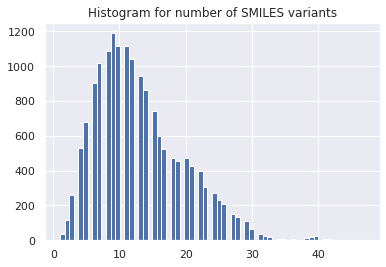

CPU times: user 22.5 s, sys: 212 ms, total: 22.7 s
Wall time: 23.8 s


In [39]:
%%time

# N-gram library in XenonPy-iQSPR
from xenonpy.inverse.iqspr import NGram

np.random.seed(201906) # fix the random seed

# Method 2: expand n-gram training set with randomly reordered SMILES
# (we show one of the many possible ways of doing it)
n_reorder = 15 # pick a fixed number of re-ordering

# convert the SMILES to canonical SMILES in RDKit (not necessary in general)
cans = []
for smi in data['SMILES']:
    # remove some molecules in the full SMILES list that may lead to error
    try:
        cans.append(Chem.MolToSmiles(Chem.MolFromSmiles(smi)))
    except:
        print(smi)
        pass

mols = [Chem.MolFromSmiles(smi) for smi in cans]
smi_reorder_all = []
smi_reorder = []
for mol in mols:
    idx = list(range(mol.GetNumAtoms()))
    tmp = [Chem.MolToSmiles(mol,rootedAtAtom=x) for x in range(len(idx))]
    smi_reorder_all.append(np.array(list(set(tmp))))
    smi_reorder.append(np.random.choice(smi_reorder_all[-1],n_reorder,
                                        replace=(len(smi_reorder_all[-1]) < n_reorder)))

n_uni = [len(x) for x in smi_reorder_all]
plt.hist(n_uni, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for number of SMILES variants")
plt.show()



In [40]:
%%time

# flatten out the list and train the N-gram
flat_list = [item for sublist in smi_reorder for item in sublist]

# first train up to order 10
n_gram_reorder1 = NGram(reorder_prob=0.5)
n_gram_reorder1.fit(flat_list,train_order=10)
# save results
with open('ngram_pubchem_ikebata_reO15_O10.obj', 'wb') as f:
    pk.dump(n_gram_reorder1, f)

# Then, train up from order 11 to 20
n_gram_reorder2 = NGram(reorder_prob=0.5)
n_gram_reorder2.fit(flat_list,train_order=(11, 20))
# save results
with open('ngram_pubchem_ikebata_reO15_O11to20.obj', 'wb') as f:
    pk.dump(n_gram_reorder2, f)

  2%|▏         | 5032/250095 [06:28<9:16:46,  7.34it/s] 

KeyboardInterrupt: 

In [34]:
# load a pre-trained n-gram from the pickle file
with open('ngram_pubchem_ikebata_reO15_O10.obj', 'rb') as f:
    n_gram = pk.load(f)

In [35]:
n_gram

NGram(del_range=None, max_len=None, min_len=None, ngram_tab=None,
      reorder_prob=None, sample_order=None)

In [36]:
# load a pre-trained n-gram from the pickle file
with open('ngram_pubchem_ikebata_reO15_O11to20.obj', 'rb') as f:
    n_gram2 = pk.load(f)

In [37]:
n_gram2

NGram(del_range=None, max_len=None, min_len=None, ngram_tab=None,
      reorder_prob=None, sample_order=None)

In [38]:
n_gram.merge_table(n_gram2)

AttributeError: 'NGram' object has no attribute '_sample_order'

In [27]:
# set up initial molecules for iQSPR
np.random.seed(201906) # fix the random seed
cans = [Chem.MolToSmiles(Chem.MolFromSmiles(smi)) for i, smi in enumerate(data_ss['SMILES'])
       if (data_ss['HOMO-LUMO gap'].iloc[i] > 4)]
init_samples = np.random.choice(cans, 25)
print(init_samples)


['CC(Cc1ccccc1)NCCn1cnc2c1c(=O)n(C)c(=O)n2C' 'CN1CCN(C)C1=O' 'N#CO'
 'COC1C(O)C(N)C(OC2OC(C(C)N)CCC2N)C(O)C1N(C)C(=O)CN' 'CCCCOP(N)(=O)OCCCC'
 'NS(=O)(=O)Cl' 'CCSC(=O)N(CC)CC' 'CCCCCC=CCC=CCC=CCCCCC(=O)O'
 'CCCCCC=CCC=CCC=CC=CC(O)CCCC(=O)O'
 'CC1NCCc2c(C(=O)N3CCCCC3)[nH]c3cccc1c23' 'ClC1C=CC(Cl)C(Cl)C1Cl'
 'CC1=CC(=O)CC1' 'CC1C(=O)NC(=O)N(C2CCCCC2)C1=O'
 'O=[N+]([O-])c1cc2nc(C(F)(F)F)[nH]c2cc1Cl' 'O=C1C=C2NC(C(=O)O)C=C2CC1=O'
 'CCSC(=O)N(CC)CC' 'CCCCCCCCOc1ccc(C(=O)c2ccccc2O)c(O)c1'
 'COc1ccc2c(c1)CCC(c1ccccc1)C2(O)c1ccccn1'
 'CCN(CCOC(=O)C(OC)(c1ccccc1)c1ccccc1)CC(C)C' 'COc1ccccc1NC(=O)CC(C)=O'
 'CC1CC2C(=CC1=O)CCC1C2CCC2(C)C1CCC2(C)O' 'C1COCCN1' 'NCCNCCO'
 'CCC(C)Cc1cccc(O)c1C' 'COC(F)(F)CCl']


In [28]:
# set up annealing schedule in iQSPR
beta = np.hstack([np.linspace(0.01,0.2,20),np.linspace(0.21,0.4,10),np.linspace(0.4,1,10),np.linspace(1,1,10)])
print('Number of steps: %i' % len(beta))
print(beta)


Number of steps: 50
[0.01       0.02       0.03       0.04       0.05       0.06
 0.07       0.08       0.09       0.1        0.11       0.12
 0.13       0.14       0.15       0.16       0.17       0.18
 0.19       0.2        0.21       0.23111111 0.25222222 0.27333333
 0.29444444 0.31555556 0.33666667 0.35777778 0.37888889 0.4
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [29]:
%%time

# library for running iQSPR in XenonPy-iQSPR
from xenonpy.inverse.iqspr import IQSPR

CPU times: user 22 µs, sys: 1 µs, total: 23 µs
Wall time: 31.2 µs


In [30]:
%%time
# update NGram parameters for this exampleHOMO-LUMO gap
n_gram.set_params(del_range=[1,20],max_len=500, reorder_prob=0.5, sample_order=(1,20))

CPU times: user 91 µs, sys: 6 µs, total: 97 µs
Wall time: 99.9 µs


NGram(del_range=(1, 20), max_len=500, min_len=None, ngram_tab=None,
      reorder_prob=0.5, sample_order=(1, 20))

In [31]:
%%time
# set up likelihood and n-gram models in iQSPR
iqspr_reorder = IQSPR(estimator=prd_mdls, modifier=n_gram)

CPU times: user 28 µs, sys: 2 µs, total: 30 µs
Wall time: 33.4 µs


In [32]:
n_gram

NGram(del_range=(1, 20), max_len=500, min_len=None, ngram_tab=None,
      reorder_prob=0.5, sample_order=(1, 20))

In [33]:
%%time
np.random.seed(201906) # fix the random seed
# main loop of iQSPR
iqspr_samples1, iqspr_loglike1, iqspr_prob1, iqspr_freq1 = [], [], [], []
for s, ll, p, freq in iqspr_reorder(init_samples, beta, yield_lpf=True):
    iqspr_samples1.append(s)
    iqspr_loglike1.append(ll)
    iqspr_prob1.append(p)
    iqspr_freq1.append(freq)

AttributeError: 'NGram' object has no attribute '_min_len'

In [36]:
a = np.arange(100)

In [37]:
len(a)

100

In [91]:
# record all outputs
iqspr_results_reorder = {
    "samples": iqspr_samples1,
    "loglike": iqspr_loglike1,
    "prob": iqspr_prob1,
    "freq": iqspr_freq1,
    "beta": beta
}
# save results
with open('iQSPR_results_reorder.obj', 'wb') as f:
    pk.dump(iqspr_results_reorder, f)

IndexError: list index out of range